In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_March23.csv


In [6]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"L'appareil utilisé est : {device}")

L'appareil utilisé est : cpu


In [8]:
#load dataset
df=pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')

In [9]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [10]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [11]:
df[['ID', 'Source', 'End_Lat', 'End_Lng', 'Description', 'Street']].head()

,ID,Source,End_Lat,End_Lng,Description,Street
0,A-1,Source2,NaN,NaN,Right lane blocked due to accident on I-70 Eas...,I-70 E
1,A-2,Source2,NaN,NaN,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd
2,A-3,Source2,NaN,NaN,Accident on OH-32 State Route 32 Westbound at ...,State Route 32
3,A-4,Source2,NaN,NaN,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S
4,A-5,Source2,NaN,NaN,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd


In [12]:
df.shape

(7728394, 46)

In [13]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

**DATA CLEANING**

In [14]:
#drop less important columns with many missing values
df_cleaned = df.drop(columns=['End_Lat', 'End_Lng', 'Wind_Chill(F)', 'Precipitation(in)'])

In [15]:
#Fill missing values for essential columns
df_cleaned['Temperature(F)'] = df_cleaned['Temperature(F)'].fillna(df['Temperature(F)'].median())
df_cleaned['Humidity(%)'] = df_cleaned['Humidity(%)'].fillna(df['Humidity(%)'].median())
df_cleaned['Weather_Condition'] = df_cleaned['Weather_Condition'].fillna(df['Weather_Condition'].mode()[0])

In [16]:
df_cleaned.isnull().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Description                   5
Street                    10869
City                        253
County                        0
State                         0
Zipcode                    1915
Country                       0
Timezone                   7808
Airport_Code              22635
Weather_Timestamp        120228
Temperature(F)                0
Humidity(%)                   0
Pressure(in)             140679
Visibility(mi)           177098
Wind_Direction           175206
Wind_Speed(mph)          571233
Weather_Condition             0
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway 

In [17]:
#Drop rows with essential missing data
df_cleaned = df_cleaned.dropna(subset=['City', 'Zipcode', 'Weather_Condition'])

In [18]:
df_cleaned.isnull().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Description                   5
Street                    10868
City                          0
County                        0
State                         0
Zipcode                       0
Country                       0
Timezone                   5893
Airport_Code              20720
Weather_Timestamp        118311
Temperature(F)                0
Humidity(%)                   0
Pressure(in)             138758
Visibility(mi)           175176
Wind_Direction           173289
Wind_Speed(mph)          569303
Weather_Condition             0
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway 

In [19]:
print(df_cleaned.shape)
print(df_cleaned.isnull().sum())

(7726228, 42)
ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Description                   5
Street                    10868
City                          0
County                        0
State                         0
Zipcode                       0
Country                       0
Timezone                   5893
Airport_Code              20720
Weather_Timestamp        118311
Temperature(F)                0
Humidity(%)                   0
Pressure(in)             138758
Visibility(mi)           175176
Wind_Direction           173289
Wind_Speed(mph)          569303
Weather_Condition             0
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                   

In [20]:
# Print the column names in the cleaned DataFrame
print(df_cleaned.columns.tolist())


['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


In [21]:
# Fill missing values for 'Description' with 'No Description'
df_cleaned['Description'].fillna('No Description', inplace=True)

# Fill missing values in 'Timezone' with the most frequent value (mode)
df_cleaned['Timezone'].fillna(df_cleaned['Timezone'].mode()[0], inplace=True)

# Fill missing values in 'Wind_Speed(mph)' with the median
df_cleaned['Wind_Speed(mph)'].fillna(df_cleaned['Wind_Speed(mph)'].median(), inplace=True)

# Fill missing values in 'Pressure(in)' with the median
df_cleaned['Pressure(in)'].fillna(df_cleaned['Pressure(in)'].median(), inplace=True)

# Fill missing values in 'Visibility(mi)' with the median
df_cleaned['Visibility(mi)'].fillna(df_cleaned['Visibility(mi)'].median(), inplace=True)

# Fill missing values in 'Temperature(F)' with the median
df_cleaned['Temperature(F)'].fillna(df_cleaned['Temperature(F)'].median(), inplace=True)

# Fill missing values in 'Humidity(%)' with the median
df_cleaned['Humidity(%)'].fillna(df_cleaned['Humidity(%)'].median(), inplace=True)

# Fill missing values in 'Wind_Direction' with the most frequent value (mode)
df_cleaned['Wind_Direction'].fillna(df_cleaned['Wind_Direction'].mode()[0], inplace=True)

# Fill missing values in 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', and 'Astronomical_Twilight' with mode
twilight_cols = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
for col in twilight_cols:
    if col in df_cleaned.columns:
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

# Drop columns with too many missing values
df_cleaned.drop(columns=['Airport_Code'], inplace=True)

# Check for any remaining missing values
print(df_cleaned.isnull().sum())


/tmp/ipykernel_30/3364327804.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Description'].fillna('No Description', inplace=True)
/tmp/ipykernel_30/3364327804.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Description                   0
Street                    10868
City                          0
County                        0
State                         0
Zipcode                       0
Country                       0
Timezone                      0
Weather_Timestamp        118311
Temperature(F)                0
Humidity(%)                   0
Pressure(in)                  0
Visibility(mi)                0
Wind_Direction                0
Wind_Speed(mph)               0
Weather_Condition             0
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabo

In [22]:
df_cleaned.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph)
count,7.726228e+06,7.726228e+06,7.726228e+06,7.726228e+06,7.726228e+06,7.726228e+06,7.726228e+06,7.726228e+06,7.726228e+06
mean,2.212367e+00,3.620157e+01,-9.470229e+01,5.613097e-01,6.171238e+01,6.487924e+01,2.954475e+01,9.110997e+00,7.634989e+00
std,4.875024e-01,5.075613e+00,1.739102e+01,1.773163e+00,1.881631e+01,2.256747e+01,9.980186e-01,2.661127e+00,5.224366e+00
min,1.000000e+00,2.455480e+01,-1.246238e+02,0.000000e+00,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.340027e+01,-1.172190e+02,0.000000e+00,5.000000e+01,4.900000e+01,2.938000e+01,1.000000e+01,5.000000e+00
50%,2.000000e+00,3.582365e+01,-8.776775e+01,3.000000e-02,6.400000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00
75%,2.000000e+00,4.008520e+01,-8.035363e+01,4.640000e-01,7.600000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.000000e+01
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.417500e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03


In [23]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7726228 entries, 0 to 7728393
Data columns (total 41 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   Distance(mi)           float64
 8   Description            object 
 9   Street                 object 
 10  City                   object 
 11  County                 object 
 12  State                  object 
 13  Zipcode                object 
 14  Country                object 
 15  Timezone               object 
 16  Weather_Timestamp      object 
 17  Temperature(F)         float64
 18  Humidity(%)            float64
 19  Pressure(in)           float64
 20  Visibility(mi)         float64
 21  Wind_Direction         object 
 22  Wind_Speed(mph)        

In [24]:
df_cleaned.drop(columns=['Street'], inplace=True)
df_cleaned.drop(columns=['Weather_Timestamp'], inplace=True)


In [25]:
print(df_cleaned.isnull().sum())

ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
Distance(mi)             0
Description              0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Temperature(F)           0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
N

In [26]:
df_cleaned['Severity'].head()

0    3
1    2
2    2
3    3
4    2
Name: Severity, dtype: int64

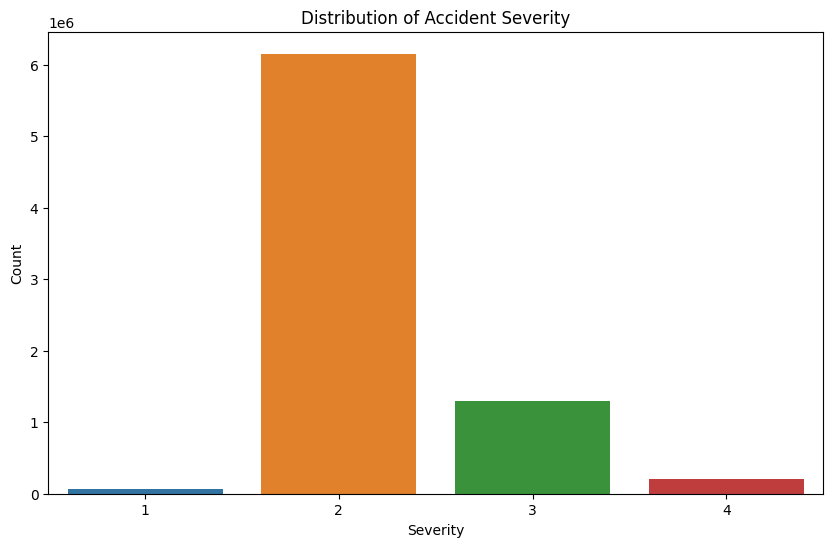

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of accident severity
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Severity')
plt.title('Distribution of Accident Severity')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()


In [28]:
# Count the occurrences of each weather condition
weather_counts = df_cleaned['Weather_Condition'].value_counts()

# Set a threshold for common weather conditions (you can adjust this)
threshold = 1000

# Replace less common weather conditions with 'Other'
df_cleaned['Weather_Condition_Grouped'] = df_cleaned['Weather_Condition'].apply(
    lambda x: x if weather_counts[x] > threshold else 'Other'
)

# Check the value counts of the grouped conditions
df_cleaned['Weather_Condition_Grouped'].value_counts()


Weather_Condition_Grouped
Fair                            2732238
Mostly Cloudy                   1016175
Cloudy                           817059
Clear                            808715
Partly Cloudy                    698944
Overcast                         382861
Light Rain                       352942
Scattered Clouds                 204823
Light Snow                       128677
Fog                               99235
Rain                              84331
Haze                              76222
Fair / Windy                      35671
Heavy Rain                        32308
Light Drizzle                     22680
Thunder in the Vicinity           17609
Cloudy / Windy                    17035
T-Storm                           16810
Mostly Cloudy / Windy             16507
Snow                              15537
Thunder                           14202
Light Rain with Thunder           13597
Smoke                             12668
Wintry Mix                        11703
Partly Cloudy 

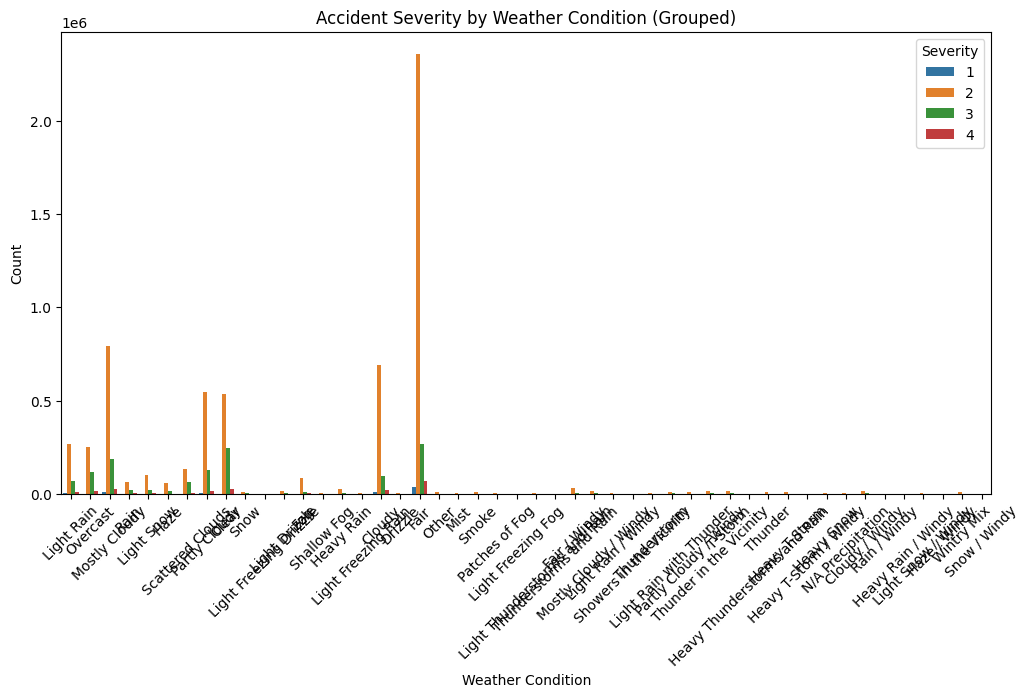

In [29]:
# Visualize the relationship between grouped weather conditions and severity
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='Weather_Condition_Grouped', hue='Severity')
plt.title('Accident Severity by Weather Condition (Grouped)')
plt.xticks(rotation=45)
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.legend(title='Severity')
plt.show()


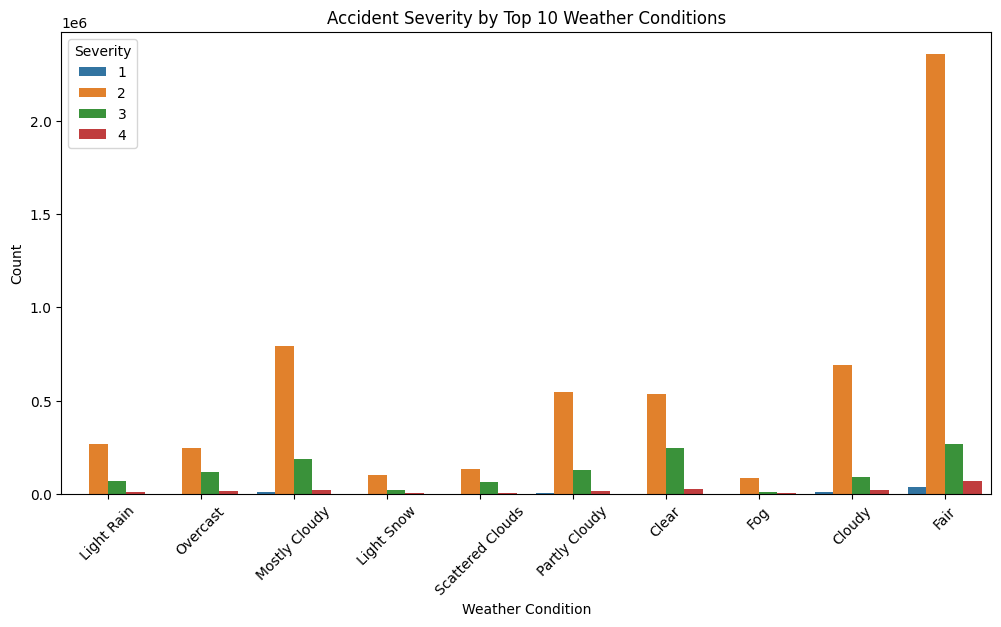

In [30]:
# Filter for the top 10 most frequent weather conditions
top_weather_conditions = weather_counts.head(10).index

# Filter the dataframe to only include these weather conditions
df_filtered = df_cleaned[df_cleaned['Weather_Condition'].isin(top_weather_conditions)]

# Visualize the relationship between top weather conditions and severity
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, x='Weather_Condition', hue='Severity')
plt.title('Accident Severity by Top 10 Weather Conditions')
plt.xticks(rotation=45)
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.legend(title='Severity')
plt.show()


In [31]:
# Remove unnecessary fractions of a second
df_cleaned['Start_Time'] = df_cleaned['Start_Time'].str.split('.').str[0]

# Convert to datetime format with error handling
df_cleaned['Start_Time'] = pd.to_datetime(df_cleaned['Start_Time'], errors='coerce')

# Drop any rows where the conversion failed (if necessary)
df_cleaned = df_cleaned.dropna(subset=['Start_Time'])

# Extract hour and day of the week for time of day analysis
df_cleaned['Hour'] = df_cleaned['Start_Time'].dt.hour
df_cleaned['Day_of_Week'] = df_cleaned['Start_Time'].dt.day_name()

# Check the cleaned data
print(df_cleaned[['Start_Time', 'Hour', 'Day_of_Week']].head())


           Start_Time  Hour Day_of_Week
0 2016-02-08 05:46:00     5      Monday
1 2016-02-08 06:07:59     6      Monday
2 2016-02-08 06:49:27     6      Monday
3 2016-02-08 07:23:34     7      Monday
4 2016-02-08 07:39:07     7      Monday


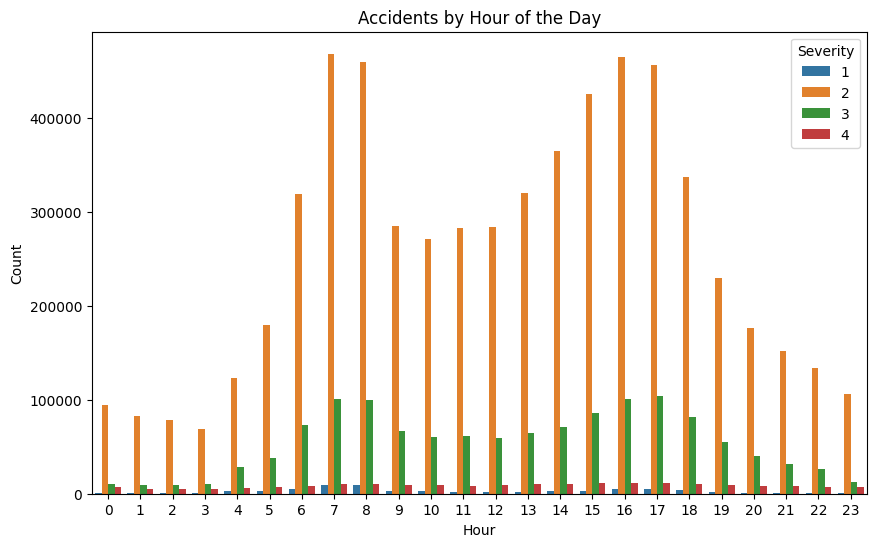

In [32]:
#Time of Day Analysis
df_cleaned['Start_Time'] = pd.to_datetime(df_cleaned['Start_Time'])
df_cleaned['Hour'] = df_cleaned['Start_Time'].dt.hour
df_cleaned['Day_of_Week'] = df_cleaned['Start_Time'].dt.day_name()

# Visualize accidents by hour
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Hour', hue='Severity')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.legend(title='Severity')
plt.show()


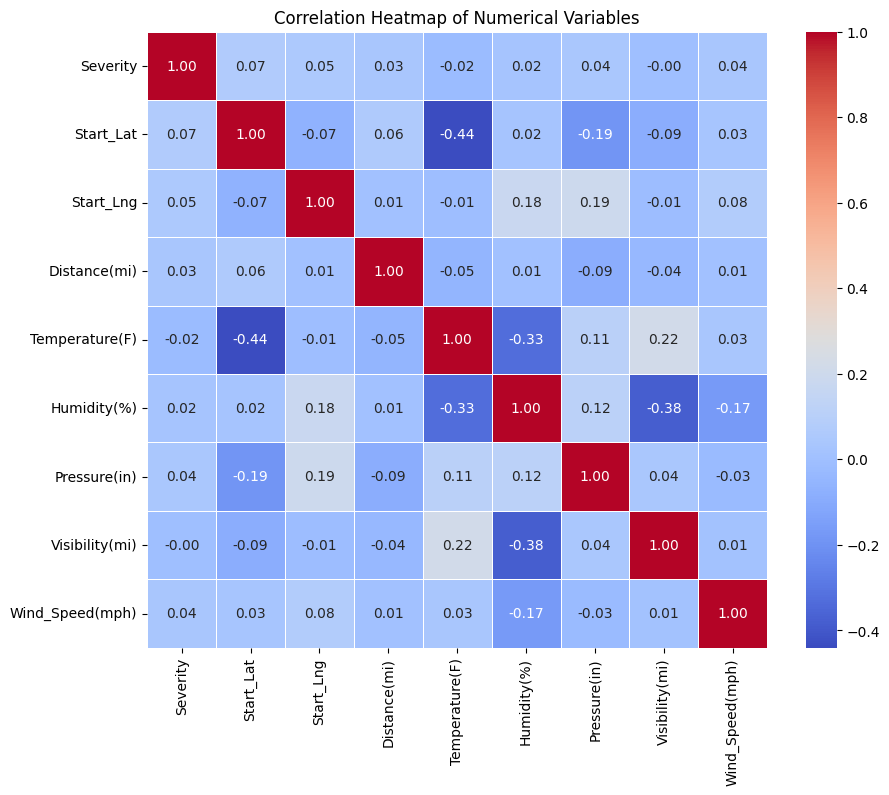

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for correlation matrix
numerical_cols = ['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Temperature(F)', 
                  'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)']

# Calculate the correlation matrix
corr_matrix = df_cleaned[numerical_cols].corr()

# Create a heatmap to visualize the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


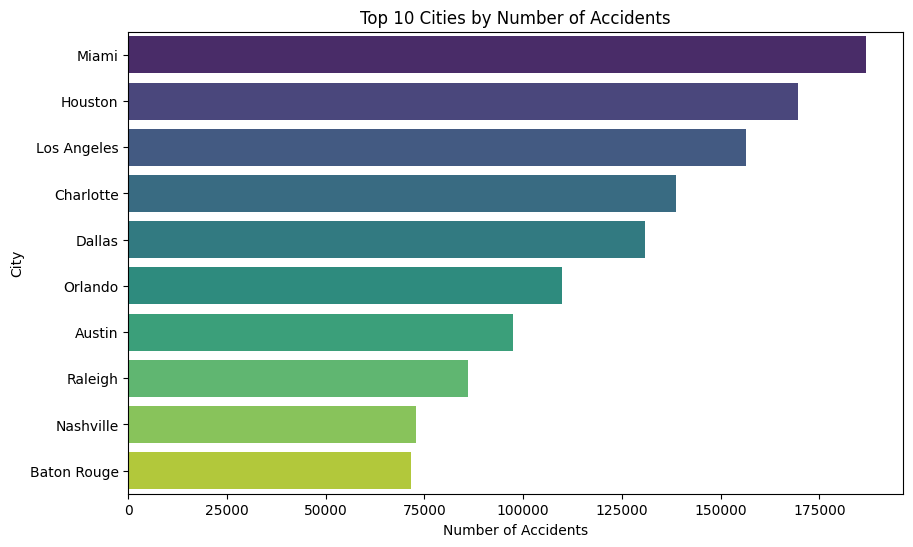

In [34]:
# Top 10 cities by number of accidents
top_cities = df_cleaned['City'].value_counts().nlargest(10)

# Visualizing the top 10 cities
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='viridis')
plt.title('Top 10 Cities by Number of Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('City')
plt.show()
